In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.isna().sum() + df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
dfcopy = df.copy()
dfcopy = dfcopy.set_index(dfcopy['country'])
dfcopy= dfcopy.iloc[:, 1:]
dfcopy
scaler = StandardScaler().fit(dfcopy)
X = scaler.transform(dfcopy)


df1 = pd.DataFrame(X, columns= dfcopy.columns, index = dfcopy.index[:])
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


In [7]:
pca = PCA(n_components=9)

pcadf = pd.DataFrame(pca.fit_transform(df1), columns= [f"PCA{i}" for i in range(1,10)], index=df1.index)
pcadf

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
country,,,,,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
Venezuela,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
Vietnam,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522


In [8]:
pca.explained_variance_ratio_


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [9]:
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}

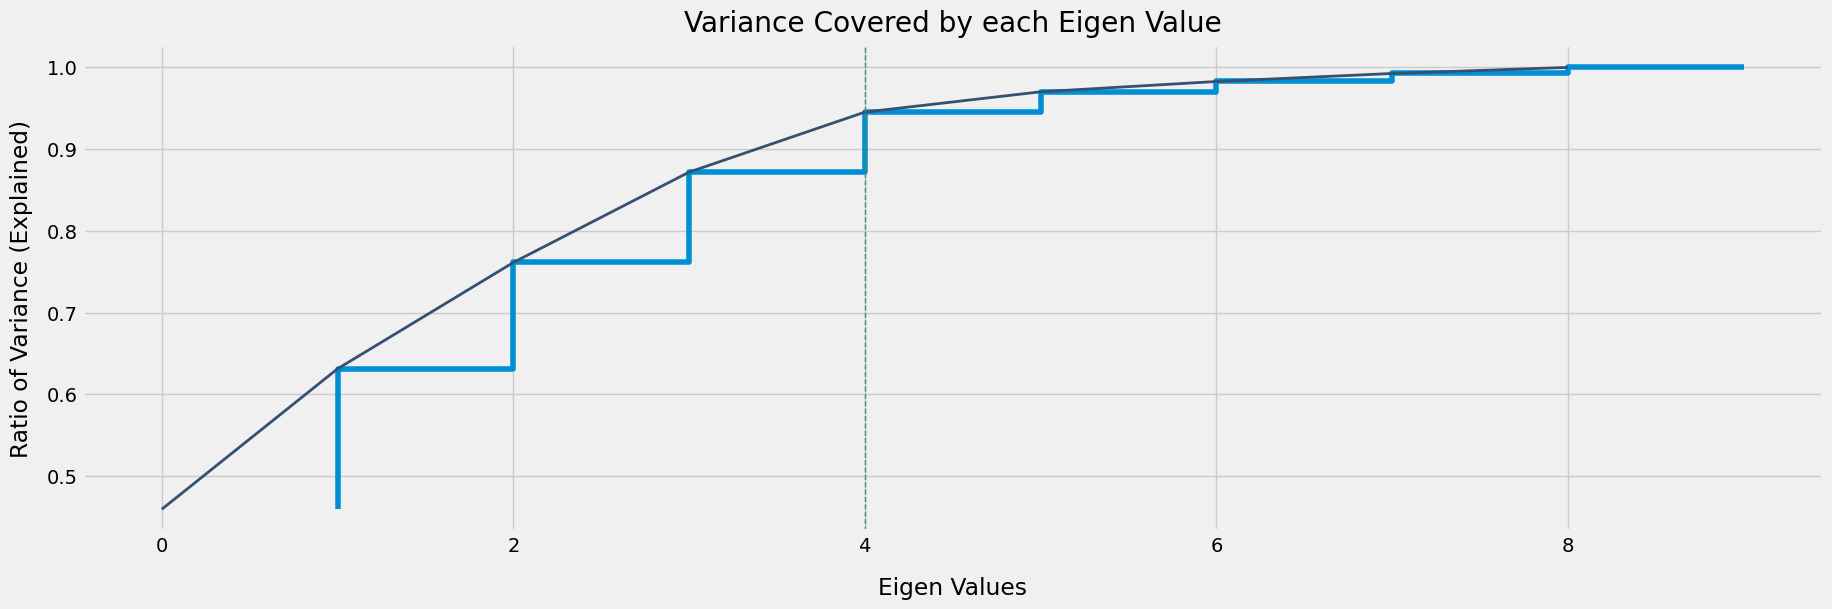

In [24]:
plt.figure(figsize=(20, 6))
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_)) # plot cusum of explained_variacne_ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="#355070", linewidth=2)
plt.axvline(x=4, color="#40916c", label='axvline-fullheight', ls='--', linewidth=1)
plt.xlabel('Eigen Values', labelpad=15)
plt.ylabel('Ratio of Variance (Explained)', labelpad=10)
plt.title('Variance Covered by each Eigen Value', pad=10)
plt.show()

In [39]:
# pcadf = pcadf.drop(columns = [f"PCA{i}" for i in range(5,10)]) # storing pc1, pc2, pc3, and pc4 
pcadf

,PCA1,PCA2,PCA3,PCA4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
Vanuatu,-0.820631,0.639570,-0.389923,-0.706595
Venezuela,-0.551036,-1.233886,3.101350,-0.115311
Vietnam,0.498524,1.390744,-0.238526,-1.074098


In [31]:
wcss =[]
for i in range(1,11):
    ktest = KMeans(n_clusters=i, **kmeans_set)
    ktest.fit(X)
    wcss.append(ktest.inertia_)
wcss

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.703325849751,
 631.6657453313587,
 563.9655186422997,
 510.418303055023,
 479.5406208897665,
 444.7895818665546,
 411.0593547697563]

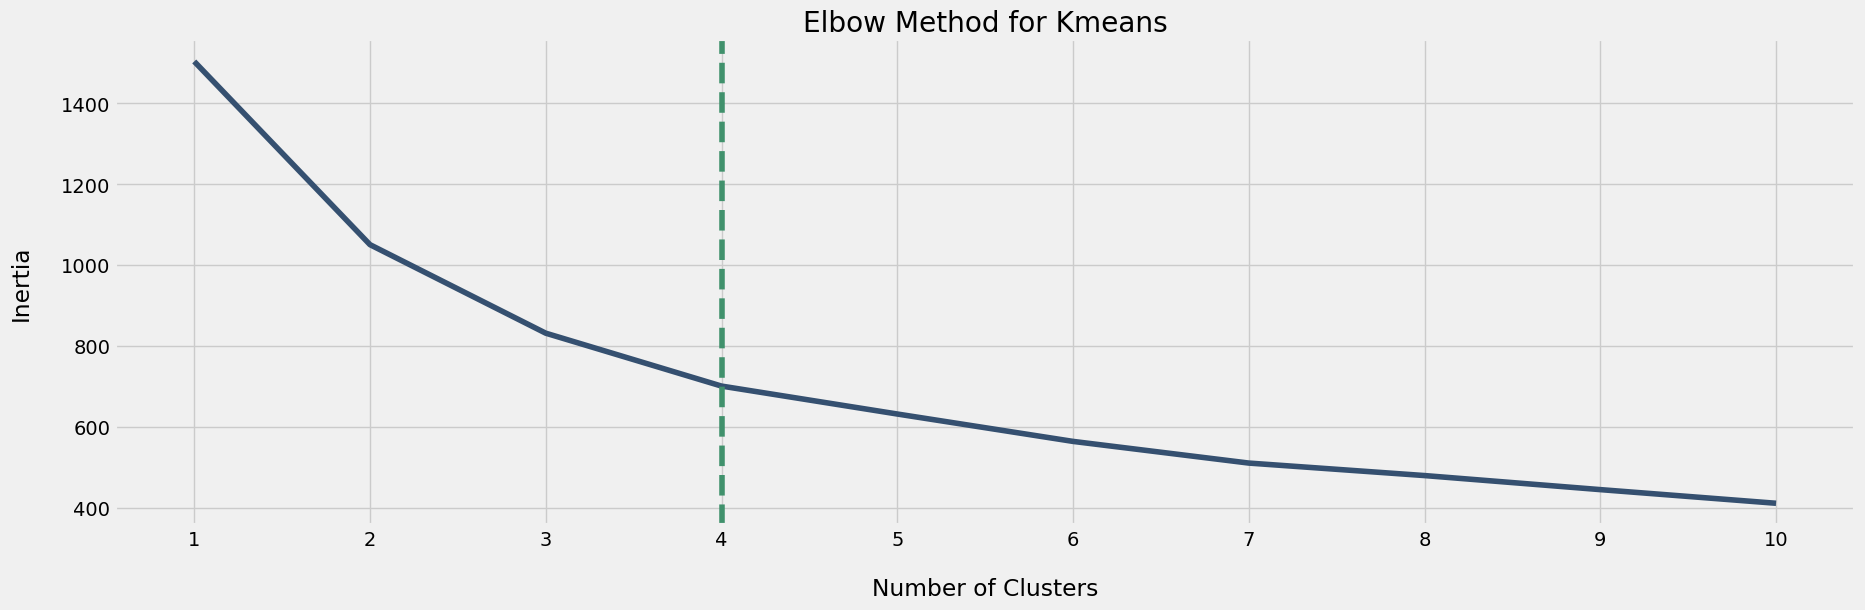

In [32]:
# sns.set()
# plt.plot(range(1,10), wcss)
# plt.title('Elbow Point Graph')
# plt.xlabel('# of Clusters')
# plt.ylabel('WCSS')
from kneed import KneeLocator

# plt.plot(range(1, 10), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

def elbow_optimizer(inertias,i):
    kl = KneeLocator(range(1,11), inertias, curve='convex', direction="decreasing")
    plt.figure(figsize=(20, 6))
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertias, color='#355070')
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20)
    plt.ylabel("Inertia", labelpad=20)
    plt.title(f"Elbow Method for {i}", y=1)
    plt.axvline(x=kl.elbow, color='#40916c', label='axvline-fullheight', ls='--')
    plt.show()
elbow_optimizer(wcss, 'Kmeans') # elbow_optimizer function for 

In [33]:

my_range = list(range(1,11))
print(my_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [34]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = []
for k in (range(2,11)):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pcadf)
    score = silhouette_score(pcadf, kmeans.labels_)
    silhouette.append(score)
calinski_harabasz = []
for k in (range(2,11)):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pcadf)
    score = calinski_harabasz_score(pcadf, kmeans.labels_)
    calinski_harabasz.append(score)

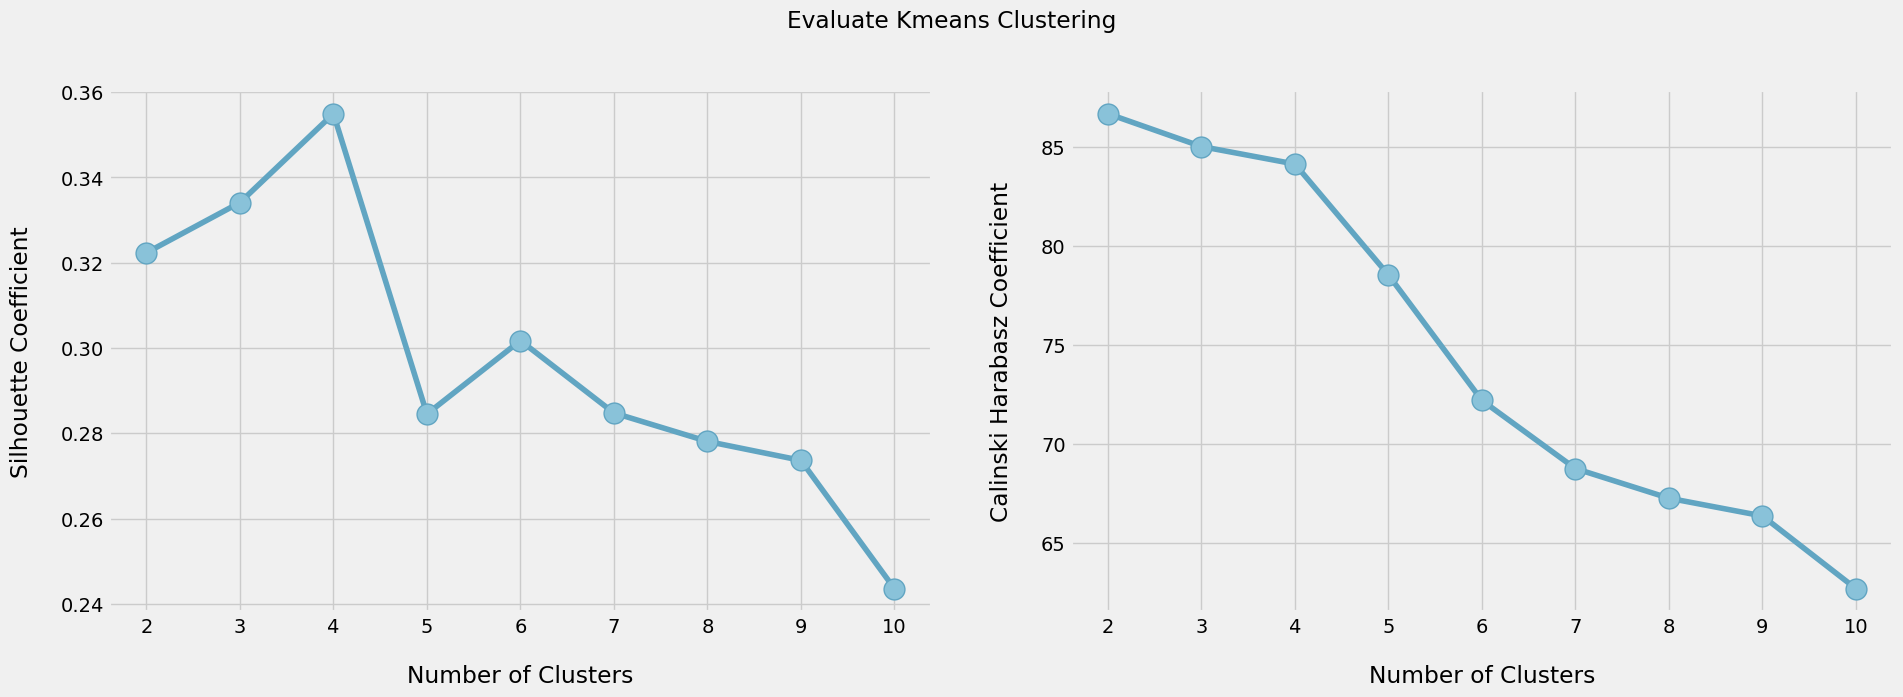

In [35]:
def plot_evaluation(sil, cal, name, x=range(2,11)):
    fig, ax = plt.subplots(1,2,figsize=(20,8), dpi=100)
    ax[0].plot(x, sil, color='#61a5c2', marker='o', ms=15, mfc='#89c2d9')
    ax[1].plot(x, cal, color='#61a5c2', marker='o', ms=15, mfc='#89c2d9')
    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("Calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.92)
    plt.tight_layout(pad=3)
    plt.show()
# checking the correctness of the elbow method's result 
plot_evaluation(silhouette, calinski_harabasz, 'Kmeans')

In [40]:
pcadf

,PCA1,PCA2,PCA3,PCA4
country,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255
Albania,0.429911,-0.588156,-0.333486,-1.161059
Algeria,-0.285225,-0.455174,1.221505,-0.868115
Angola,-2.932423,1.695555,1.525044,0.839625
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
Vanuatu,-0.820631,0.639570,-0.389923,-0.706595
Venezuela,-0.551036,-1.233886,3.101350,-0.115311
Vietnam,0.498524,1.390744,-0.238526,-1.074098


In [43]:
model = KMeans(n_clusters=4, **kmeans_set).fit(pcadf)
pred = model.labels_
centroids = model.cluster_centers_
centroids = pd.DataFrame(data=centroids, columns = [pcadf.columns])
centroids.T


,0,1,2,3
PCA1,-2.400695,0.266593,5.460225,2.608934
PCA2,0.429863,-0.130548,5.432473,-0.881836
PCA3,-0.119772,0.034515,0.211648,0.072803
PCA4,0.676417,-0.748682,0.906058,1.032730


In [44]:
best_model = pd.DataFrame({'model':[], 'sil_score':[], 'ch_score':[]})

In [47]:
best_model.loc[len(best_model.index)] = [f"Kmeans",silhouette_score(pcadf, pred),calinski_harabasz_score(pcadf, pred)]

In [48]:
df_result_kmeans = pd.concat([pcadf, pd.DataFrame(pred, columns=['cluster'], index=pcadf.index)], axis = 1) ## adding the clusters column to the main dataframe
df_result_kmeans

,PCA1,PCA2,PCA3,PCA4,cluster
country,,,,,
Afghanistan,-2.913025,0.095621,-0.718118,1.005255,0
Albania,0.429911,-0.588156,-0.333486,-1.161059,1
Algeria,-0.285225,-0.455174,1.221505,-0.868115,1
Angola,-2.932423,1.695555,1.525044,0.839625,0
Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,1
...,...,...,...,...,...
Vanuatu,-0.820631,0.639570,-0.389923,-0.706595,1
Venezuela,-0.551036,-1.233886,3.101350,-0.115311,1
Vietnam,0.498524,1.390744,-0.238526,-1.074098,1


/var/folders/92/dndhqf_n2glcdc5khwzrh8zw0000gp/T/ipykernel_36996/2214628222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[0, 0] = sns.countplot(data=data, x='cluster', palette="Blues", ax=ax[0, 0])
/var/folders/92/dndhqf_n2glcdc5khwzrh8zw0000gp/T/ipykernel_36996/2214628222.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0)


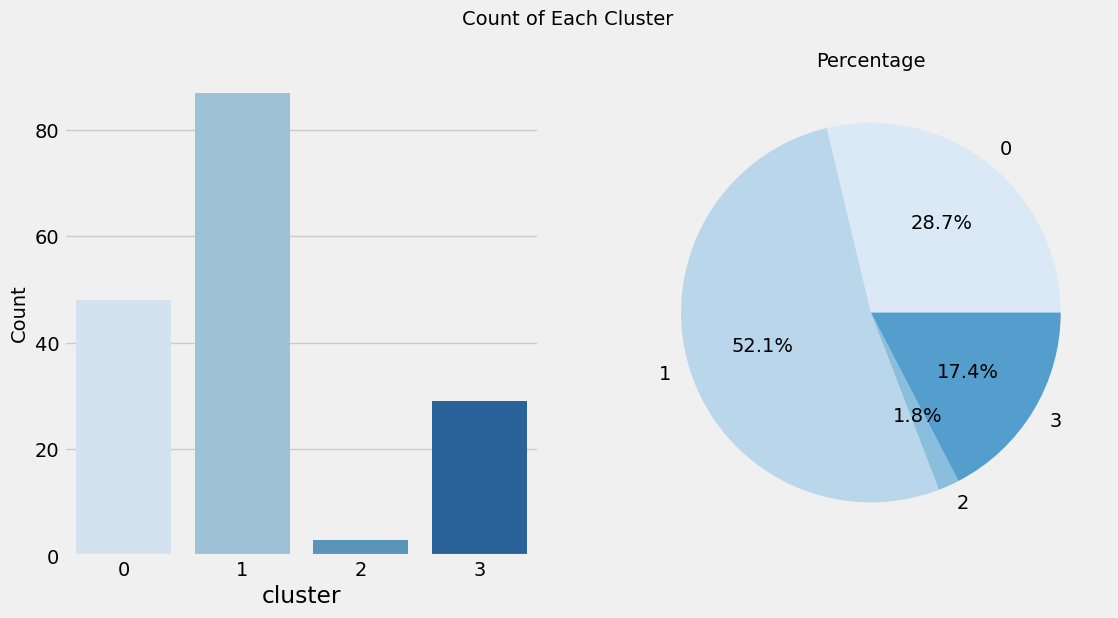

In [50]:
def check_result(data,plot=False):
    if plot:
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(data=data, x='cluster', palette="Blues", ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count',fontsize=14)
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0)
        slices = data['cluster'].value_counts().sort_index().values
        activities = [var for var in data['cluster'].value_counts().sort_index().index]
        ax[0, 1] = plt.pie(slices, labels=activities,
                           colors=sns.color_palette('Blues'), autopct='%1.01f%%')
        plt.title("Percentage",fontsize=14)
        fig.set_size_inches(12, 6)
        fig.suptitle('Count of Each Cluster', fontsize=14)
        plt.show()
check_result(df_result_kmeans, plot=True)

In [15]:
df['cluster'] = Y
df['PCA1'] = X[:, 0]
df['PCA2'] = X[:, 1]
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,PCA1,PCA2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.291532,-1.138280
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,-0.538949,-0.479658
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,-0.272833,-0.099122
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2.007808,0.775381
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,-0.695634,0.160668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,-0.225578,0.200917
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,-0.526514,-0.461363
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,-0.372315,1.130305
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0.448417,-0.406478


Text(0, 0.5, 'PCA2')

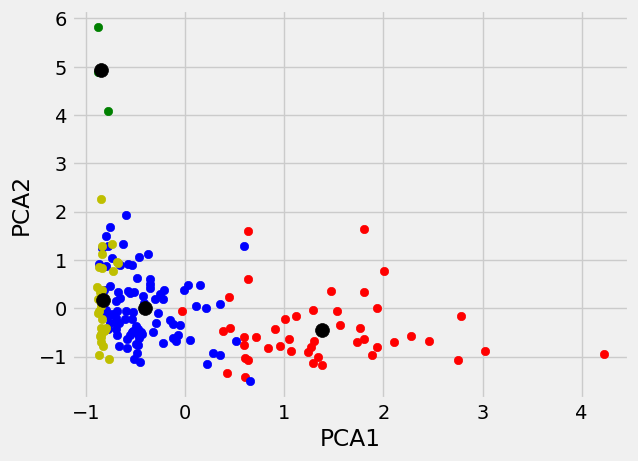

In [16]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
df3=df[df['cluster']==3]
plt.scatter(df0.PCA1,df0["PCA2"],color='r')
plt.scatter(df1.PCA1,df1["PCA2"],color='g')
plt.scatter(df2.PCA1,df2["PCA2"],color='b')
plt.scatter(df3.PCA1,df3["PCA2"],color='y')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c='black', label='Centroid')


plt.xlabel('PCA1')
plt.ylabel('PCA2')